In [1]:
import numpy as np
import pickle
from tabulate import tabulate
import matplotlib.pyplot as plt
import os
import dill
import pandas as pd

In [2]:
def data_smooth(data,n_avg):
    ind_vec = np.arange(n_avg,len(data)+1,n_avg)
    data_avg = []
    for ind in ind_vec:
        data_avg.append(np.mean(data[ind-n_avg:ind]))
    return data_avg


def sort_loss(val):
    return val[1]

def load_trials(fname):
    print('Loading trials...')
    trials = pickle.load(open(fname,'rb'), encoding="bytes")
    for i in range(len(trials.trials)):
        for key in trials.trials[i]['misc']['vals'].keys():
            trials.trials[i]['misc']['vals'][key] = round(trials.trials[i]['misc']['vals'][key][0],4)
    tab_data = [[i, trials.losses()[i], trials.trials[i]['result']['loss_runs']] for i in range(len(trials.trials))]
    tab_data.sort(key = sort_loss, reverse = True)
    print(tabulate(tab_data, headers = ['Run No', 'Loss', 'Loss Runs']))

    tab_data = [[i, trials.losses()[i], trials.trials[i]['misc']['vals']] for i in range(len(trials.trials))]
    tab_data.sort(key = sort_loss, reverse = True)
    print(tabulate(tab_data))
    return trials

def plot_R_run(trials,run_no):
    r_data = trials.trials[run_no]['result']['loss_episodes']
    N_avg = 100
    for run_data in r_data:
        R_plot = data_smooth(run_data, N_avg)
        plt.plot((np.arange(len(R_plot)) + 1) * N_avg, R_plot)
#     plt.xlim((0, 2100))
#     plt.ylim((-550, 0))
    plt.show()

In [3]:
trials = load_trials('opt_lunland_18_3.pkl')

Loading trials...
  Run No    Loss  Loss Runs
--------  ------  --------------------------------------------------------------------------------------------------------------------------------------------------------------
     104  689962  [658084.28876225, 563673.7885232168, 739670.1773928438, 602075.3931361515, 663248.3531350441, 490463.9329005114, 748627.204374582, 594552.7319350706]
      39  660785  [566277.9670833386, 586670.9233533144, 602525.193645707, 683995.0526592955, 650298.9635419683, 655521.2948372858, 698135.9678924414, 529638.3558548056]
      74  657852  [571618.6341234664, 508738.06940037257, 671205.1000794679, 637462.5444229108, 553921.0250235824, 754553.4248777786, 474088.2244311222, 626829.447391117]
       5  647351  [688969.0178225707, 494719.10963873187, 663765.6474513519, 508190.9179119604, 561164.4220023577, 553502.345889335, 585411.4084560823, 714415.1548245843]
      50  646795  [632626.6013071617, 667660.120448644, 384546.21987082146, 646915.2072133347, 58

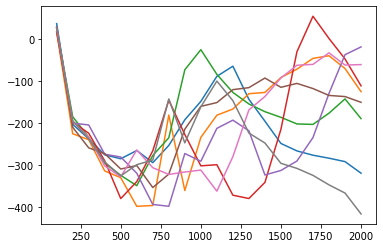

In [5]:
%matplotlib inline
plot_R_run(trials,82)